In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [67]:
match_history = pd.read_csv("Data/Team Histories.csv")
matches = pd.read_csv("Data/Match Data.csv")

In [68]:
dates = sorted(np.unique(match_history["Date"]))

In [69]:
date_season = matches[["Date", "Season"]].drop_duplicates().set_index("Date").to_dict(orient = "index")

teams_in_season = {season: matches[matches["Season"] == season]["Home"].unique() for season in matches["Season"].unique()}


In [70]:
from ipywidgets import IntProgress
from IPython.display import display

from matplotlib.animation import FuncAnimation

import time



def getElosOnDate(date):
    most_recent_elos = match_history[match_history["Date"] < date].sort_values("Date").groupby("Team").tail(1).sort_values("New Elo")
    return most_recent_elos[most_recent_elos["Team"].isin(teams_in_season[date_season[date]["Season"]])]




def calculateTimeRemaining(ts, n):
    average_time = np.mean(ts)
    seconds_remaining = (n - len(times)) * average_time

    m, s = divmod(seconds_remaining, 60)
    if m >= 0:
        return f"{int(m)}:{np.round(s, 1)}"

def animate(i):
    
    times.append(time.time())

    if len(times) >= 2:
        time_deltas.append(times[-1] -  times[-2])

        print(f"Estimated time remaining: {calculateTimeRemaining(time_deltas, N)}", end = '\r')

    
    
    elos = getElosOnDate(dates[i])

    ax.clear()
    ax.barh(elos["Team"], elos["New Elo"])
    ax.set_title(dates[i])
    ax.set_ylabel("Elo")
        
    f.value += 1

    

    return ax



IntProgress(value=0, max=3168)

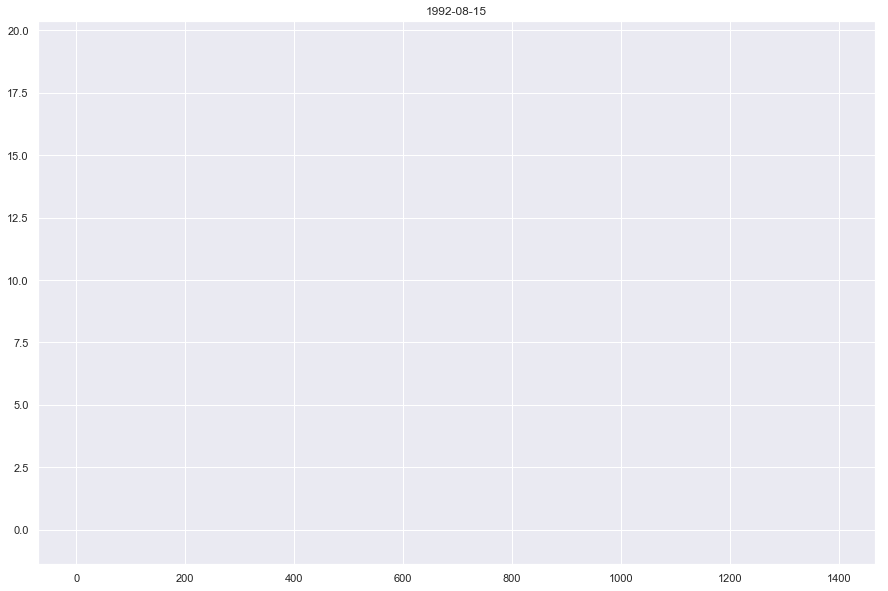

In [71]:
fig, ax = plt.subplots(figsize = (15, 10))


times = []
time_deltas = []


N = len(dates)

f = IntProgress(min=0, max=N)
display(f)

ani = FuncAnimation(fig, animate, frames = N, interval = 100, repeat = False)
ani.save("PL ELO History.mp4")